## Take Home Challenge 1.1



## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
#reading the json data into pandas
df = pd.read_json('logins.json')
df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [4]:
#overall view of the data.
df.describe()

login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

This shows that some timestamps appears more than once going by the difference between unique counts and total counts

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
#checking if we have null values in the dataset
df.isnull().sum()

login_time    0
dtype: int64

In [7]:
#converting the dataset to time series format that can analyzed
ts = pd.DataFrame(np.arange(len(df)), index=df['login_time'], columns=['counts'])
ts.head()

counts
login_time                 
1970-01-01 20:13:18       0
1970-01-01 20:16:10       1
1970-01-01 20:16:37       2
1970-01-01 20:16:36       3
1970-01-01 20:26:21       4

In [8]:
#converting frequency of time series to 15 mins 
ts2 = ts.resample('15T').count()
ts2.head()

counts
login_time                 
1970-01-01 20:00:00       2
1970-01-01 20:15:00       6
1970-01-01 20:30:00       9
1970-01-01 20:45:00       7
1970-01-01 21:00:00       1

To start off, we need to note that there are two types of time domain models:

- models that relate the present value of a series to past values and past prediction errors - these are called ARIMA models (for Autoregressive Integrated Moving Average).  
- ordinary regression models that use time indices as x-variables.  These are sometimes helpful for an initial description of the data and form the basis of several simple forecasting methods. The dataset provided is of this type.


It is also important to note that some important questions to first consider when first looking at a time series are:

- Is there a trend, meaning that, on average, the measurements tend to increase (or decrease) over time?
- Is there seasonality, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?
- Are their outliers? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
- Is there a long-run cycle or period unrelated to seasonality factors?
- Is there constant variance over time, or is the variance non-constant?
- Are there any abrupt changes to either the level of the series or the variance?

Reference: https://onlinecourses.science.psu.edu/stat510/node/47

(array([ 719171.,  719185.,  719199.,  719213.,  719227.,  719241.,
         719255.,  719269.]), <a list of 8 Text xticklabel objects>)

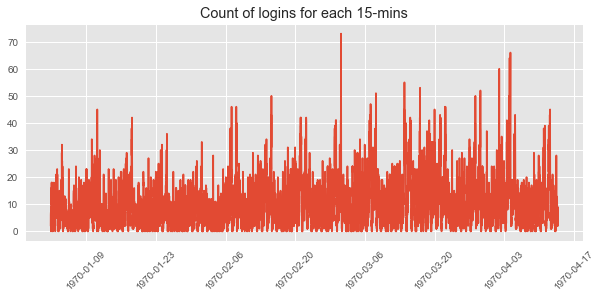

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(ts2.index, ts2.counts)
plt.title('Count of logins for each 15-mins')
plt.xticks(rotation=45)

From the above plot, we see the following:
- the time series spans a period of about 3.5 months from January 9, 1970 through April 17, 1970. 
- overall, there is no consistent upward or downward trend over the entire time span. The series appears to slowly wander up and down at some points and spike at others.  
- it difficult to tell if there is any seasonality in the data. Only way to tell that is by zooming into the time series
- it is possible we have one or two outliers that needs further investigation.
- It’s difficult to judge whether the variance is constant or not, except we zoom into the time series.
 

In [10]:
#i decided to create a function since the plotting of the graphs will be repetitive
def time_series(a):
    """this function creates the plot for different time 
      series cycles
    """
    xy = ts.resample(a).count()
    xy2= xy.head(7)
    fig, ax = plt.subplots(figsize=(10,4))
    plt.plot(xy.index, xy.counts)
    plt.title('Count of logins for each %s' %a)
    plt.xticks(rotation=45)
    print (xy2)    

                     counts
login_time                 
1970-01-01 20:00:00      24
1970-01-01 21:00:00       9
1970-01-01 22:00:00      21
1970-01-01 23:00:00      58
1970-01-02 00:00:00      53
1970-01-02 01:00:00      33
1970-01-02 02:00:00      43


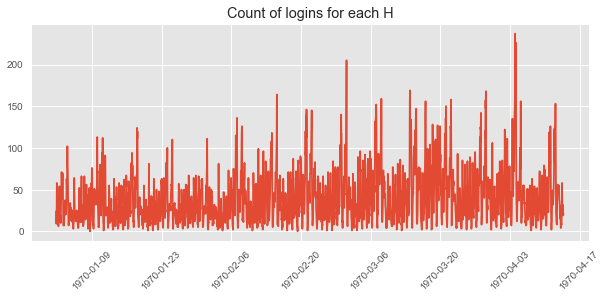

In [11]:
time_series('H')

This plot is about the same as the 15 mins login counts except that we are now beginning to see that outliers are now more obvious. 

            counts
login_time        
1970-01-01     112
1970-01-02     681
1970-01-03     793
1970-01-04     788
1970-01-05     459
1970-01-06     536
1970-01-07     648


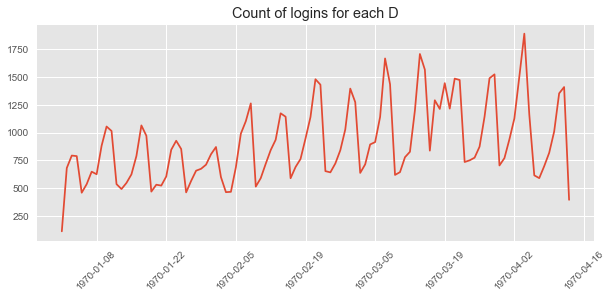

In [12]:
time_series('D')

Looking at the daily login counts above, we are now beginning to see some trends. Revisiting our checks, we see that:

- the plot increased sharply in the first week, and then gradually trended upward over the entire time span to some points before steeply declining afterward.
- there is now some seasonality in the data. The plot shows that during every two weeks period, we have two spikes each corresponding to about same time during the week. This probably need further investigation.
- it is still possible we have one or two outliers, but not very glaring as compared with the 15 minutes and hourly plot.
- we are now begining to see that variance of the login counts may not be constant overall. 


            counts
login_time        
1970-01-04    2374
1970-01-11    5217
1970-01-18    5023
1970-01-25    4751
1970-02-01    4744
1970-02-08    5572
1970-02-15    5915


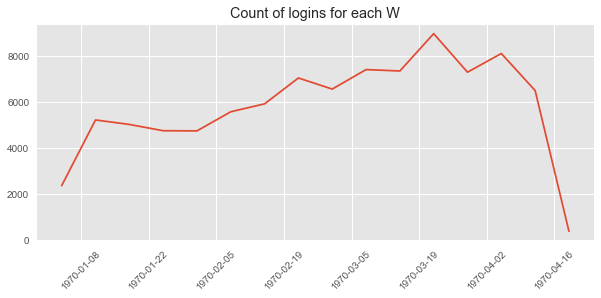

In [13]:
time_series('W')

The weekly plot further supports information seen in other plots that:

- the plot increased sharply in the first week, and then gradually trended upward over the entire time span to some points before steeply declining afterward.
- we are not able to see much about seasonality here.
- it is still possible we have one or two outliers, but not very glaring as compared with the 15 minutes and hourly plot.
- variance of the login counts may not be constant overall.

            counts
login_time        
1970-01-04    2374
1970-01-18   10240
1970-02-01    9495
1970-02-15   11487
1970-03-01   13589
1970-03-15   14736
1970-03-29   16240


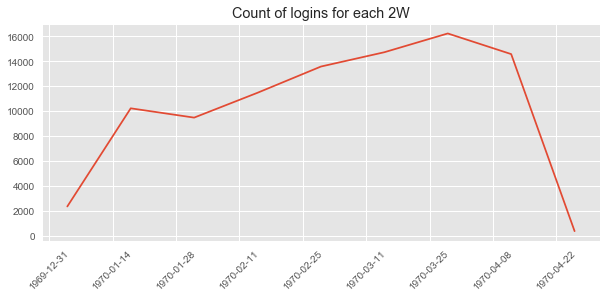

In [14]:
time_series('2W')

            counts
login_time        
1970-01-31   21239
1970-02-28   24673
1970-03-31   33723
1970-04-30   13507


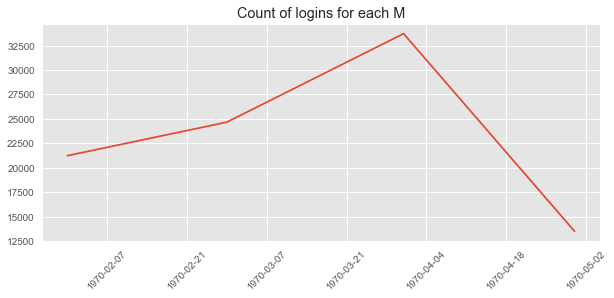

In [15]:
time_series('M')

Lumping up the 2 weeks and monthly charts together since they are providing about same information, we see:

- trend here is same with the daily and weekly plot, but much more obvious. 
- we are not able to see much about seasonality here.
- it is still possible we have one or two outliers, but not very glaring as compared with the 15 minutes and hourly plot.
- variance of the login counts may not be constant overall.

Having seen all the plots, I would say points that look interesting to me are the seasonalities and possibly the outliers. Zooming into the weekly plots to see why we have a spike in about same time during the week will probably provide more information.

In [16]:
#daily counts of a random two weeks period
cnt = ts.resample('D').count()
dly_two_wks = cnt['1970-02-05':'1970-02-18']

#daily counts of the first of the two weeks period
dly_frst_wk= cnt['1970-02-05':'1970-02-11']

#daily counts of the second of the two weeks period
dly_scnd_wk= cnt['1970-02-12':'1970-02-18']

(array([ 719199.,  719201.,  719203.,  719205.,  719207.,  719209.,  719211.]),
 <a list of 7 Text xticklabel objects>)

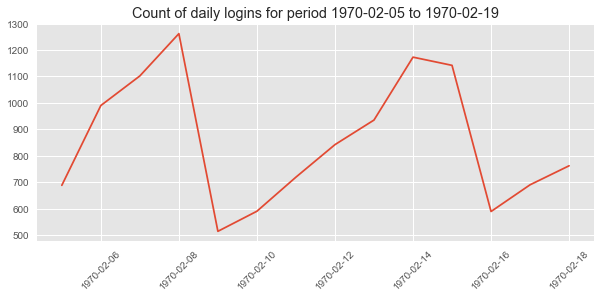

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(dly_two_wks.index, dly_two_wks.counts)
plt.title('Count of daily logins for period 1970-02-05 to 1970-02-19')
plt.xticks(rotation=45)

(array([ 719198.,  719199.,  719200.,  719201.,  719202.,  719203.,  719204.]),
 <a list of 7 Text xticklabel objects>)

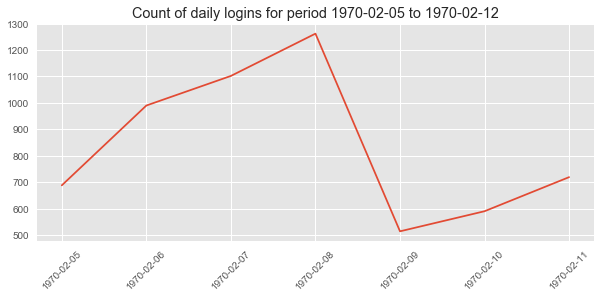

In [18]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(dly_frst_wk.index, dly_frst_wk.counts)
plt.title('Count of daily logins for period 1970-02-05 to 1970-02-12')
plt.xticks(rotation=45)

(array([ 719205.,  719206.,  719207.,  719208.,  719209.,  719210.,  719211.]),
 <a list of 7 Text xticklabel objects>)

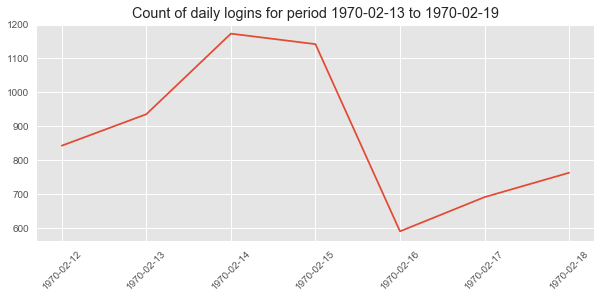

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(dly_scnd_wk.index, dly_scnd_wk.counts)
plt.title('Count of daily logins for period 1970-02-13 to 1970-02-19')
plt.xticks(rotation=45)

Based on the three plot above after zooming in on the weekly plots, we see that login counts sharply trends up from the start of the week hitting a high midweek (third or fourth day) and then steeply declines close to the end of week (fifth day) before rising again. Similar trends can be seen in all other weeks. So it suffices to say the following from this investigation:

- login counts sharply decline close to the end of each week (about fifth day of the week)
- login counts hits a peak midweek of each week (third or fourth day of the week)
- overall trend of login counts steady increases weekly as mentioned till hitting an overall high in the week beginning 1970-03-25 before sharply declining and continuing in same manner.
- I don't think the outlier(s) noticed in some of the plots are necessarily bad because the still follow the usual first two weekly pattern mentioned here. However, further investigation needs to be done as to why that happened in the week beginning 1970-04-02.




## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## SOLUTION

**Number 1**

First off, most managers with the Ultimate managers not an exception only care about meeting an expected target based on business or operational goals. This sometimes could translates into revenue, meeting an expected service level or both. From the case study, Ultimate manager are much after meeting service level first, which could translate into revenue, and the driver partners are means to that end. The driver partners are the observational units. Measurements can be taken on them to achieve the goal or to test a procedure. The kind of measurements or variable one can collect from such drivers are thus:

1. id - Driver partner identification number (Int64)
2. cty - City driver is from (Binary variable: 1 for Ultimate Gotham and 0 for Ultimate Metropolis)
3. signup_dte - Sign-up date for driver in city he/she's from (YYYY MM DD: datetime)
4. last_trp_dte - Last trip date for driver to the other city (YYYY MM DD: datetime)
5. ave_dist - Average distance in miles per trip taken to other city in the fiscal quarter (float64)
6. num_trps - How many trips made to the other city within the quarter (Int64)
7. surge_pct - The percent of trips taken with surge multiplier > 1
8. avg_surge - The average surge multiplier over all of this user’s trips

Most of all these point to one thing - availability! Would the driver partner be available when either cities is active during the weekdays? If not, would waiving the toll fees incentivize them to be available? Since the case study specifically mentioned that the cities are most active at certain times than the other, and activities are normal over the weekend, i would think a surge parameter should be a good measure of success. So, question is, would driver partner be able to meet demand when we have a surge in activities? 



**Number 2**

If the dependent variable is percentage of trips taken with surge multiplier > 1, such that it is reasonably normally distributed and exists on an interval and the independent variable is time which has two levels that are repeated or matched, such as time before and after reimbursing all toll costs we can use a **paired-sample t-test** for the analysis. A paired-sample t-test is a one-sample t-test in disguise because it simply calculates the difference between paired observations (e.g., before and after) and then performs a 1-sample t-test on the differences.

- Ho = There are no significant differences in pre and post sample mean percentage of trips taken with surge in activities

- Ha = There are is a significant differences in pre and post sample mean percentage of trips taken with surge in activities

Based on the Staistical question and hypotheses above and the hypotheses below:

- The dependent variable must be continuous (interval/ratio).
- The observations are independent of one another.
- The dependent variable should be approximately normally distributed.
- The dependent variable should not contain any outliers.

we calculate a paired samples t-statics with the formula below

                   t = Summation(X1 - X2)/SE of the difference

where t is is the paired t-test value that follows a t distribution that is normal based on the CLT on the horizontal axis, and a probability density function on the vertical axis. This t-statistic correspond to a p-value on the y-axis.  X1 and X2 are the pre and post sample mean percentage of trips taken with surge in activities. And, SE is the Standard Error of the difference. SE is inversely proportional to t.

If the corresponsing p-value from the t-statics is less than the significant level of α = 0.05, we reject the null hypothesis Ho, concluding that there is a significant diffrences in the pre and post sample mean percentage of trips taken with surge in activities after toll costs were reimbursed. So it is advisable for Ultimate manager to keep waving these fees. However, if the p-value is greater than α = 0.05, then the reverse is the case.






## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

**Data description**
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

### I am still investigating this solution to see why the out of bag validation method of Random Forest is giving me a much different result from the KFold Cross Validation Method. I will also try the Gradient Boosted Trees with XGBoost to see how that differs. Not much of an EDA on here, but updates and final solution for this are progressively uploaded to by GitHub at www.github.com/andyogah 

In [20]:
from pandas.io.json import json_normalize
#df2 = pd.read_json('ultimate_data_challenge.json', lines=True, orient=str)
js = json.load((open('ultimate_data_challenge.json')))
df2 = json_normalize(js)
df2.head(3)

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7        1.1   
1      8.26                   5.0                   5.0        1.0   
2      0.77                   5.0                   4.3        1.0   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0

In [21]:
df2.shape

(50000, 12)

In [22]:
#This shows variables with null values
df2.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [23]:
from sklearn.base import TransformerMixin
#this class was used to impute missing values
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill) 
   

In [24]:
#imputing missing values.
df3 = DataFrameImputer().fit_transform(df2)
df3.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0  
3                       9                 True         80.0  
4                      14                False         82.4

In [25]:
#This shows variables with all nulls values filled in
df3.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [26]:
#This shows the data types of all variables. Of particular interest is datetime variables. Pandas automatically loads those as  
#strings. That needs to be coverted to a datetime object
df3.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
weekday_pct               float64
dtype: object

In [27]:
#Conversion of datetime variables to required format to enable analysis. This can also be done by setting the "parse_dates"  
#parameter to True when reading in the data 
df3['last_trip_date']= pd.to_datetime(df3['last_trip_date'])
df3['signup_date']= pd.to_datetime(df3['signup_date'])

In [28]:
#showing data types after conversion of the datetime variable.
df3.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
dtype: object

In [29]:
df3.describe()

avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          50000.000000          50000.000000  50000.000000   
mean       5.796827              4.779050              4.650038      1.074764   
std        5.707357              0.445974              0.575601      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.500000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  50000.000000            50000.000000  50000.000000  
mean       8.849536                2.278200     60.926084  
std       19.958811                3.792684     37.081503  
min        0.000000                0.000000      0.000000  
25%        0.000000                0.000000     33.300000  
50%        0.000000                1.000000     66.700000  
75%        8.600000                3.000000    100.000000  
max      100.000000              125.000000    100.000000

In [30]:
#fig = plt.figure(figsize=(30, 20))
#fig.add_subplot(1,1,1)
#sns.countplot(x="iyear", hue="INT_IDEO", data=df3)

In [31]:
df3.head(10)

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   
5     10.56                   5.0                   3.5       1.00   
6      3.95                   4.0                   4.9       1.00   
7      2.04                   5.0                   5.0       1.00   
8      4.36                   5.0                   4.5       1.00   
9      2.37                   5.0                   4.9       1.00   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   
5      Winterfell     2014-06-06   iPhone  2014-01-09        0.0   
6         Astapor     2014-01-25  Android  2014-01-24        0.0   
7      Winterfell     2014-01-29   iPhone  2014-01-28        0.0   
8      Winterfell     2014-02-01  Android  2014-01-21        0.0   
9      Winterfell     2014-01-05  Android  2014-01-03        0.0   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0  
3                       9                 True         80.0  
4                      14                False         82.4  
5                       2                 True        100.0  
6                       1                False        100.0  
7                       2                False        100.0  
8                       2                False        100.0  
9                       1                False          0.0

### Feature Engineering

In [32]:
from datetime import timedelta
from datetime import datetime

If the data was pulled several months later after user signed up in January 2014, it would make sense to use the last login date as a reference to judge retained users, since a user is retained if they were “active” (i.e. took a trip) in the preceding 30 days at the time data was pulled. This is in terms of the maximum date in the dataset

In [33]:
max(df3['last_trip_date'])

Timestamp('2014-07-01 00:00:00')

In [34]:
max(df3['last_trip_date']- df3['signup_date'])

Timedelta('181 days 00:00:00')

In [35]:
df3['active_user']=(max(df3['last_trip_date']) - df3['last_trip_date']) < timedelta(30)

In [36]:
df4 = df3.drop(['signup_date', 'last_trip_date']  , axis=1)
df4.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city    phone  surge_pct  trips_in_first_30_days  \
0  King's Landing   iPhone       15.4                       4   
1         Astapor  Android        0.0                       0   
2         Astapor   iPhone        0.0                       3   
3  King's Landing   iPhone       20.0                       9   
4      Winterfell  Android       11.8                      14   

   ultimate_black_user  weekday_pct  active_user  
0                 True         46.2         True  
1                False         50.0        False  
2                False        100.0        False  
3                 True         80.0         True  
4                False         82.4        False

### Hot coding categorical variables

In [37]:
#selecting 2 features to hard code
some_var1 = ['city', 'phone']

#hot code the features
hot_code = pd.get_dummies(df4[some_var1])

#drop original variables once dummy variables have been created 
dfg = df4.drop(['city', 'phone'], axis=1)

#merge the created dummy variables with the original dataframe and reset the index for the overall dataframe
df5 = pd.concat([dfg, hot_code], axis=1).reset_index(drop=True)
df5.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  surge_pct  \
0      3.67                   5.0                   4.7       1.10       15.4   
1      8.26                   5.0                   5.0       1.00        0.0   
2      0.77                   5.0                   4.3       1.00        0.0   
3      2.36                   4.9                   4.6       1.14       20.0   
4      3.13                   4.9                   4.4       1.19       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  active_user  \
0                       4                 True         46.2         True   
1                       0                False         50.0        False   
2                       3                False        100.0        False   
3                       9                 True         80.0         True   
4                      14                False         82.4        False   

   city_Astapor  city_King's Landing  city_Winterfell  phone_Android  \
0             0                    1                0              0   
1             1                    0                0              1   
2             1                    0                0              0   
3             0                    1                0              0   
4             0                    0                1              1   

   phone_iPhone  
0             1  
1             0  
2             1  
3             1  
4             0

In [38]:
#selecting the boolean features in preparation to be hot coded
some_var2 = ['ultimate_black_user', 'active_user']

#hot coding of the boolean features
for x in some_var2:
    df5[x] = (df5[x] == True).astype(int)
    

In [39]:
df5.head(20)

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0       3.67                   5.0                   4.7       1.10   
1       8.26                   5.0                   5.0       1.00   
2       0.77                   5.0                   4.3       1.00   
3       2.36                   4.9                   4.6       1.14   
4       3.13                   4.9                   4.4       1.19   
5      10.56                   5.0                   3.5       1.00   
6       3.95                   4.0                   4.9       1.00   
7       2.04                   5.0                   5.0       1.00   
8       4.36                   5.0                   4.5       1.00   
9       2.37                   5.0                   4.9       1.00   
10      4.28                   4.9                   5.0       1.00   
11      3.81                   5.0                   4.0       1.00   
12     20.29                   5.0                   4.9       1.00   
13      3.04                   5.0                   4.0       1.38   
14     26.01                   5.0                   4.9       1.00   
15     13.20                   5.0                   4.9       1.00   
16     10.86                   3.0                   5.0       1.00   
17      2.38                   4.8                   3.9       1.00   
18      6.83                   4.8                   4.6       1.21   
19     12.08                   5.0                   5.0       1.17   

    surge_pct  trips_in_first_30_days  ultimate_black_user  weekday_pct  \
0        15.4                       4                    1         46.2   
1         0.0                       0                    0         50.0   
2         0.0                       3                    0        100.0   
3        20.0                       9                    1         80.0   
4        11.8                      14                    0         82.4   
5         0.0                       2                    1        100.0   
6         0.0                       1                    0        100.0   
7         0.0                       2                    0        100.0   
8         0.0                       2                    0        100.0   
9         0.0                       1                    0          0.0   
10        0.0                       1                    1        100.0   
11        0.0                       3                    0        100.0   
12        0.0                       1                    0        100.0   
13       50.0                       0                    0         50.0   
14        0.0                       1                    0        100.0   
15        0.0                       1                    1        100.0   
16        0.0                       1                    1         50.0   
17        0.0                       0                    1         95.2   
18       30.8                       6                    1         80.8   
19       33.3                       0                    0         66.7   

    active_user  city_Astapor  city_King's Landing  city_Winterfell  \
0             1             0                    1                0   
1             0             1                    0                0   
2             0             1                    0                0   
3             1             0                    1                0   
4             0             0                    0                1   
5             1             0                    0                1   
6             0             1                    0                0   
7             0             0                    0                1   
8             0             0                    0                1   
9             0             0                    0                1   
10            0             0                    0                1   
11            0             0                    0                1   
12           

### Creating the predictors and the target variables

In [40]:
X = df5.drop('active_user', axis=1)
y = df5['active_user']

In [41]:
X.shape, y.shape

((50000, 13), (50000,))

In [42]:
#Shows the number of unique labels in our target variable. 
len(y.unique())

2

In [43]:
#shows the unique labels/classes themselves
y.unique()

array([1, 0], dtype=int64)

In [44]:
#shows the number of examples/observations in each classes.
y.value_counts()

0    31690
1    18310
Name: active_user, dtype: int64

This is an imbalanced dataset. We can fix it thus:

In [45]:
from sklearn.utils import resample

In [46]:
df_majority = df5[df5['active_user'] == 0]

In [47]:
df_minority = df5[df5['active_user'] == 1]

In [48]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=31690,    # to match majority class
                                 random_state=123) # reproducible results

In [49]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [50]:
df_upsampled['active_user'].value_counts()

1    31690
0    31690
Name: active_user, dtype: int64

In [51]:
df_upsampled.shape

(63380, 14)

In [52]:
D = df_upsampled.drop('active_user', axis=1)
E = df_upsampled['active_user']

In [53]:
# Split the data into 40% test and 60% training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(D, E, test_size=0.4, random_state=0)

In [54]:
X_train.shape, X_test.shape

((38028, 13), (25352, 13))

In [55]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

In [56]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
#Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    print(feature)

('avg_dist', 0.29953468699192998)
('avg_rating_by_driver', 0.11912768949953506)
('avg_rating_of_driver', 0.080323093716147431)
('avg_surge', 0.062080450237774927)
('surge_pct', 0.074479585346543434)
('trips_in_first_30_days', 0.08251136723710327)
('ultimate_black_user', 0.031374837442102191)
('weekday_pct', 0.12437964202420763)
('city_Astapor', 0.017948233650003975)
("city_King's Landing", 0.05150803125041134)
('city_Winterfell', 0.012314175292899337)
('phone_Android', 0.022612417428135832)
('phone_iPhone', 0.021805789883205851)


In [58]:
feature_rank = pd.DataFrame(clf.feature_importances_)
feature_rank.columns = ['rank']  

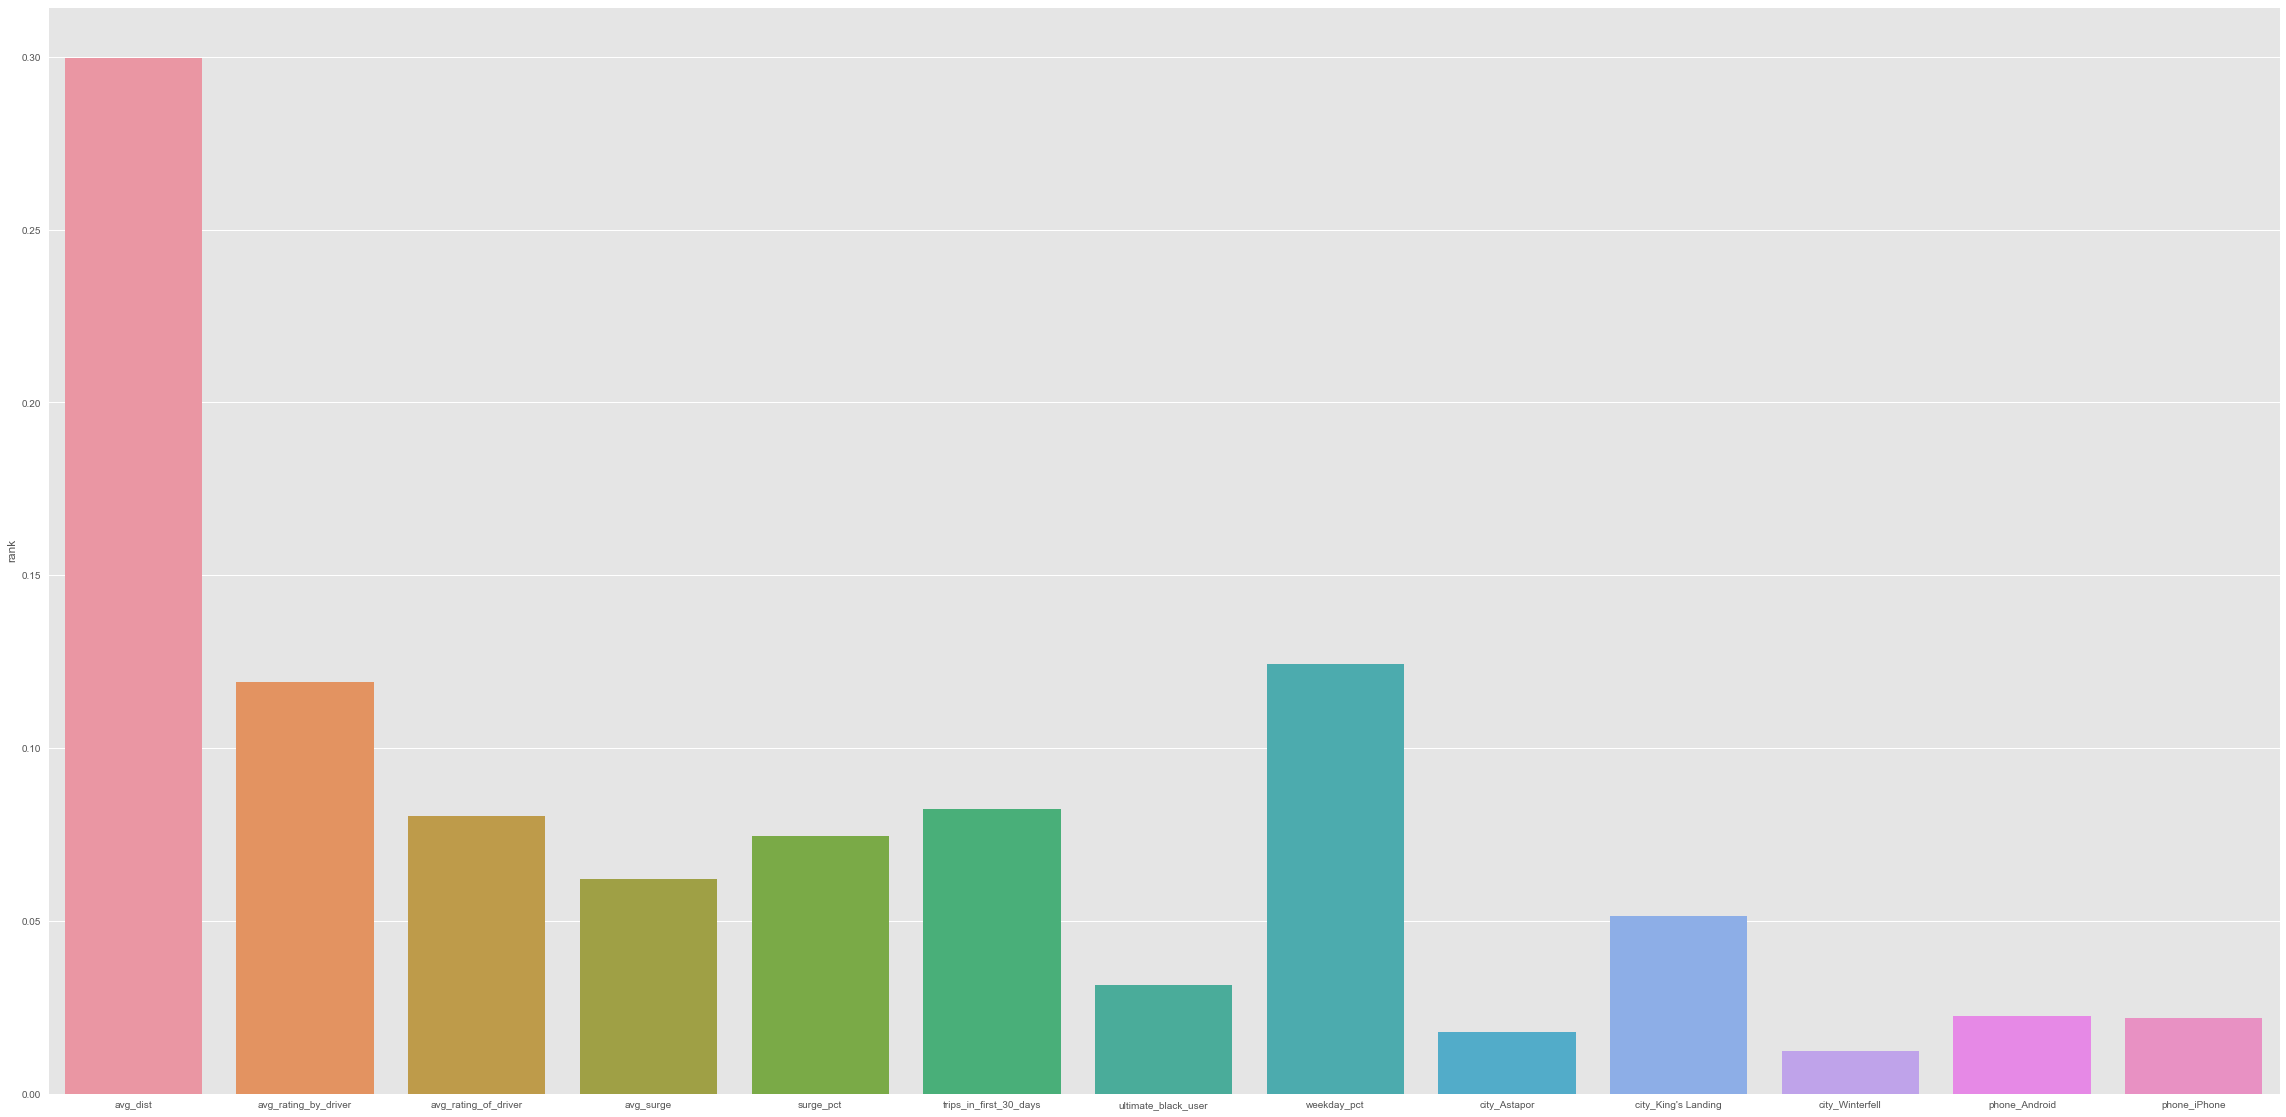

In [59]:
plt.figure(figsize=(40,20)) # this creates a figure 8 inch wide, 4 inch high
sns.barplot(x = X.columns, y = 'rank',  data = feature_rank, order = X.columns )
plt.show()

In [60]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.050
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.022)

In [61]:
# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.022)

In [62]:
#Print the names of the most important features
imprt_columns = []
for feature_list_index in sfm.get_support(indices=True):
    imprt_columns.append(D.columns[feature_list_index])
print(imprt_columns)

['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', "city_King's Landing", 'phone_Android']


In [63]:
df6 = df5[imprt_columns].reset_index(drop=True)
df6.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  surge_pct  \
0      3.67                   5.0                   4.7       1.10       15.4   
1      8.26                   5.0                   5.0       1.00        0.0   
2      0.77                   5.0                   4.3       1.00        0.0   
3      2.36                   4.9                   4.6       1.14       20.0   
4      3.13                   4.9                   4.4       1.19       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  \
0                       4                    1         46.2   
1                       0                    0         50.0   
2                       3                    0        100.0   
3                       9                    1         80.0   
4                      14                    0         82.4   

   city_King's Landing  phone_Android  
0                    1              0  
1                    0              1  
2                    0              0  
3                    1              0  
4                    0              1

In [64]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [65]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
#Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83776427895235095

In [67]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_important_pred)

0.83354370463868732

In [68]:
from sklearn.model_selection import KFold

In [69]:
def classification_model(model, D, E):
  #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=10, random_state=None, shuffle=True)
    error = []
    for train_index, test_index in kf.split(D):
    # Filter training data
        X_train, X_test = D.iloc[train_index], D.iloc[test_index]

        # The target we're using to train the algorithm.
        y_train, y_test = E[train_index], E[test_index]

        # Training the algorithm using the predictors and target.
        model.fit(X_train, y_train)

        #Record error from each cross-validation run
        error.append(model.score(X_test,y_test))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


In [70]:
for estimators in [50, 100, 120, 150, 200, 500, 1000]:
    model = RandomForestClassifier(n_estimators=estimators)
    classification_model(model, X, y)

Cross-Validation Score : 76.260%
Cross-Validation Score : 76.438%
Cross-Validation Score : 76.480%
Cross-Validation Score : 76.330%
Cross-Validation Score : 76.324%
Cross-Validation Score : 76.390%
Cross-Validation Score : 76.368%


In [71]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_important_pred)
#plot_confusion_matrix(confusion_mat)

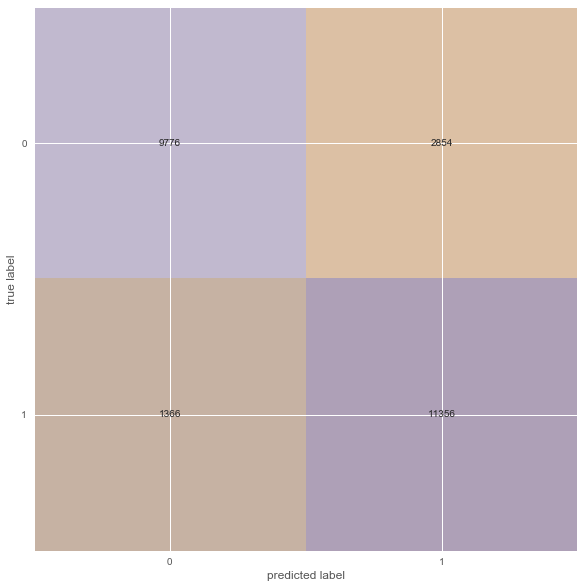

In [72]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat, figsize= [10, 10], cmap='PuOr')
plt.show()